In [1]:
from scipy.linalg import expm, eig
from scipy.sparse.csgraph import laplacian
from matplotlib import pyplot
import networkx as nx
import pandas as pd
import numpy as np
import random as rand

'''
Print out a pretty matrix
'''
def pp(mat):
    print(pd.DataFrame(mat))
    print()

'''
Return an empty matrix of specified size
'''
def empty_mat(size):
    mat = []
    for y in range(size):
        row = []
        for x in range(size):
            row.append([])
        mat.append(row)
    return mat

def zero_mat(size):
    mat = []
    for y in range(size):
        row = []
        for x in range(size):
            row.append(0)
        mat.append(row)
    return mat

'''
Excludes values from excl
'''
def exclude(ret, excl):
    new_arr = []

    for i in ret:
        if i not in excl:
            new_arr.append(i)

    return new_arr

'''
Optimal network generation
'''
def optimal(k=2, n=5, r=1):
    nodes = [0]*n
    nodes[rand.choice(range(n))] = 1
    adj = zero_mat(n)

    for i in range(k):
        for j in range(k):
            if i != j:
                adj[i][j] = 1


    for i in range(k-1, n):
        added = False
        chosen_node = rand.choice(range(0, k))
        if rand.random() <= 1-r:
            adj[chosen_node][i] = 1
            added = True
        else:
            to_remove = [chosen_node]
            while not added:
                chosen_node = rand.choice()
                chosen_node = exclude(range(k), to_remove)[rand.randint(0, k - len(to_remove) - 1)]
                print("****" + str(chosen_node) + "****")
                if rand.random() <= r:
                    print("*****")
                    adj[chosen_node][i] = 1
                    added = True
                else:
                    to_remove.append(chosen_node)
            print(to_remove)
            print(adj)
        print(i)
    return adj





'''
Return a random adjacency matrix
'''
def gen_mat(size):
    graph = nx.erdos_renyi_graph(size, .25, directed=True)

    adj = nx.adjacency_matrix(graph)
    return adj.todense()

def draw_graph(adj):
    newadj = np.array(adj)
    graph = nx.from_numpy_matrix(newadj)
    nx.draw(graph)
    pyplot.show()


'''
Get multiple random adjacency matrices
'''
def gen_mats(cnt, size=0):
    mats = []
    if (size == 0):
        for i in range(cnt):
            mats.append(gen_mat(rand.randint(2, 10)))
    else:
        for i in range(cnt):
            mats.append(gen_mat(size))
    return mats

'''
Plot multiple adjacency matrices when passed through
the matrix expontential
'''
def draw_expms(mats):
    for mat in mats:
        plot_expm(expm_entries(mat))

'''
Create an NxN matrix showing how close values got to one
i.e. If an entry in the returned matrix is 0, that means it reached 0
'''
def closest_to_one(mat):
    closest = [] # NxN matrix with each entry being how close it got to 1
    for row in mat:
        clos_row = []
        for entry in row:
            min_val = 1-entry[0]
            for data in entry:
                if 1-data < min_val:
                    min_val = 1-data
            clos_row.append(min_val)

        closest.append(clos_row)

    return closest

'''
Creates a matrix with matrix exponential values over the time 0-3pi
'''
def expm_entries(mat):
    time = 0.0
    times = []
    series = empty_mat(len(mat))

    while time < 3*np.pi:
        u = np.abs(expm(-1j*mat*time))
        for y in range(len(mat)):
            for x in range(len(mat)):
                series[y][x].append(u[y][x])

        times.append(time)
        time += 0.01

    return [times, series]

'''
Plots a matrix exponential matrix over time
'''
def plot_expm(coupled, legend, title=""):
    times = coupled[0]
    series = coupled[1]

    entry_num = 0
    for y in range(len(mat)):
        for x in range(len(mat)):
            if (x != y):
                pyplot.plot(times, series[y][x], label=str(entry_num))
                entry_num += 1
    if legend:
        pyplot.legend(loc='upper left')
    pyplot.title(title)
    pyplot.show()

'''
Automating optimal network creation
'''
def n_node_optimal(n, k):
    num_edges = k * (n-1)


def five_node_optimal(k):
    n_node_optimal(5, k)

***************** Adjacency Matrix *******************
   0  1  2  3  4
0  0  0  0  0  0
1  1  0  0  0  0
2  1  0  0  0  0
3  1  0  0  0  0
4  0  1  0  0  0


***************** Laplacian Matrix *******************
   0  1  2  3  4
0  3  0  0  0  0
1 -1  1  0  0  0
2 -1  0  0  0  0
3 -1  0  0  0  0
4  0 -1  0  0  0


***************** Laplacian Eigenvalues *******************
(array([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 3.+0.j]), array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.81649658],
       [ 0.        ,  0.70710678,  0.        ,  0.        , -0.40824829],
       [ 0.        ,  0.        ,  1.        ,  0.        , -0.27216553],
       [ 0.        ,  0.        ,  0.        ,  1.        , -0.27216553],
       [ 1.        , -0.70710678,  0.        ,  0.        ,  0.13608276]]))

***************** Adjacency Eigenvalues *******************
(array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]), array([[ 0.0000000e+000,  0.0000000e+000,  0.0000000e+000,
         0.0000000e+000,  0.00

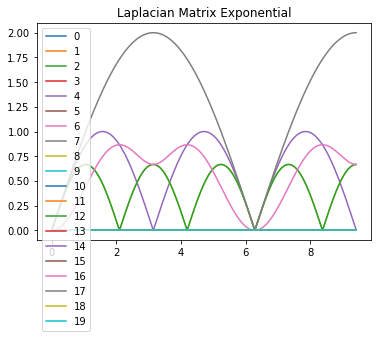


***************** How close each entry got to 1 *******************
              0             1    2             3             4
0 -1.998401e-15  1.000000e+00  1.0  1.000000e+00  1.000000e+00
1 -8.420000e+00 -1.776357e-15  1.0  1.000000e+00  1.000000e+00
2 -8.420000e+00  1.000000e+00  0.0  1.000000e+00  1.000000e+00
3 -8.420000e+00  1.000000e+00  1.0 -2.220446e-16  1.000000e+00
4 -4.336820e+01 -8.420000e+00  1.0  1.000000e+00 -4.440892e-16



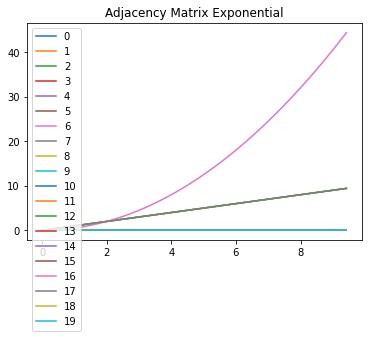

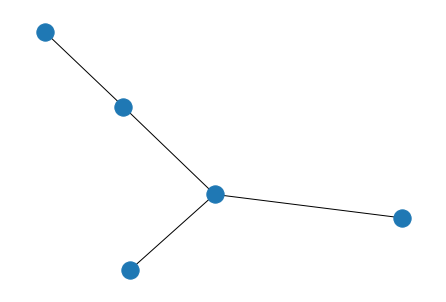

In [2]:
mat = np.matrix([[0,0,0,0,0],[1,0,0,0,0],[1,0,0,0,0],[1,0,0,0,0],[1,0,0,0,0]]) # 5
mat = np.matrix([
        [0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
    ])
laplace = laplacian(mat, normed=False) # generate the laplacian

print("***************** Adjacency Matrix *******************")
pp(mat)                                     # Print the adjacency matrix
print("\n***************** Laplacian Matrix *******************")
pp(laplace)
print("\n***************** Laplacian Eigenvalues *******************")
print(eig(laplace))  # checking reality
print("\n***************** Adjacency Eigenvalues *******************")
print(eig(mat))

series = expm_entries(laplace)                  # Generate the expm series
print("\n***************** How close each entry got to 1 *******************")
pp(closest_to_one(series[1]))               # Show how close each entry got to one
plot_expm(series, True, title="Laplacian Matrix Exponential")

series = expm_entries(mat)
print("\n***************** How close each entry got to 1 *******************")
pp(closest_to_one(series[1]))               # Show how close each entry got to one
plot_expm(series, True, title="Adjacency Matrix Exponential")

draw_graph(mat)

***************** Adjacency Matrix *******************
   0  1  2  3  4
0  0  1  0  0  0
1  1  0  0  0  0
2  1  1  0  0  0
3  1  1  0  0  0
4  1  1  0  0  0


***************** Laplacian Matrix *******************
   0  1  2  3  4
0  4 -1  0  0  0
1 -1  4  0  0  0
2 -1 -1  0  0  0
3 -1 -1  0  0  0
4 -1 -1  0  0  0


***************** Laplacian Eigenvalues *******************
(array([0.+0.j, 0.+0.j, 0.+0.j, 5.+0.j, 3.+0.j]), array([[ 0.        ,  0.        ,  0.        , -0.70710678,  0.54772256],
       [ 0.        ,  0.        ,  0.        ,  0.70710678,  0.54772256],
       [ 1.        ,  0.        ,  0.        ,  0.        , -0.36514837],
       [ 0.        ,  1.        ,  0.        ,  0.        , -0.36514837],
       [ 0.        ,  0.        ,  1.        ,  0.        , -0.36514837]]))

***************** Adjacency Eigenvalues *******************
(array([ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j, -1.+0.j]), array([[ 0.        ,  0.        ,  0.        ,  0.26726124,  0.70710678],
       [ 0

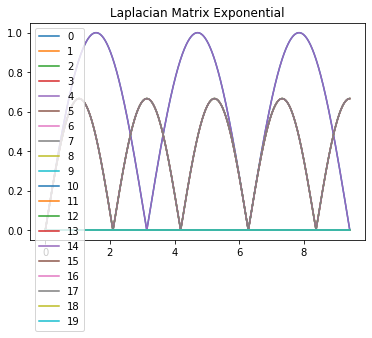


***************** How close each entry got to 1 *******************
              0             1             2             3             4
0  0.000000e+00  3.170682e-07  1.000000e+00  1.000000e+00  1.000000e+00
1  3.170682e-07  0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00
2 -9.999994e-01 -9.999994e-01 -8.881784e-16  1.000000e+00  1.000000e+00
3 -9.999994e-01 -9.999994e-01  1.000000e+00 -2.220446e-16  1.000000e+00
4 -9.999994e-01 -9.999994e-01  1.000000e+00  1.000000e+00 -2.220446e-16



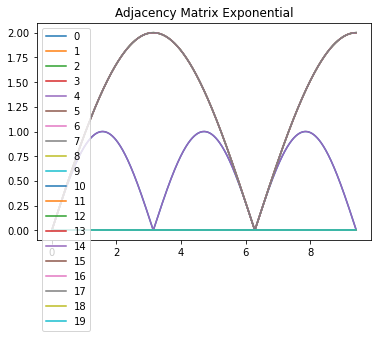

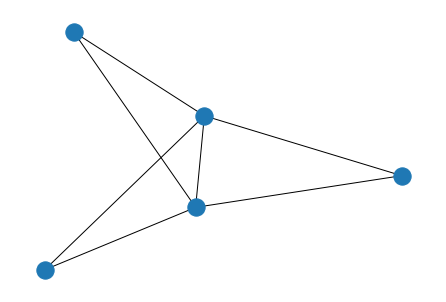

In [3]:
# k=2, s=1
mat = np.matrix([
        [0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 1, 0, 0, 0],
    ])
laplace = laplacian(mat, normed=False) # generate the laplacian

print("***************** Adjacency Matrix *******************")
pp(mat)                                     # Print the adjacency matrix
print("\n***************** Laplacian Matrix *******************")
pp(laplace)
print("\n***************** Laplacian Eigenvalues *******************")
print(eig(laplace))  # checking reality
print("\n***************** Adjacency Eigenvalues *******************")
print(eig(mat))

series = expm_entries(laplace)                  # Generate the expm series
print("\n***************** How close each entry got to 1 *******************")
pp(closest_to_one(series[1]))               # Show how close each entry got to one
plot_expm(series, True, title="Laplacian Matrix Exponential")

series = expm_entries(mat)
print("\n***************** How close each entry got to 1 *******************")
pp(closest_to_one(series[1]))               # Show how close each entry got to one
plot_expm(series, True, title="Adjacency Matrix Exponential")

draw_graph(mat)

***************** Adjacency Matrix *******************
   0  1  2  3  4
0  0  1  1  0  0
1  1  0  1  0  0
2  1  1  0  0  0
3  1  1  1  0  0
4  1  1  1  0  0


***************** Laplacian Matrix *******************
   0  1  2  3  4
0  4 -1 -1  0  0
1 -1  4 -1  0  0
2 -1 -1  4  0  0
3 -1 -1 -1  0  0
4 -1 -1 -1  0  0


***************** Laplacian Eigenvalues *******************
(array([0.+0.j, 0.+0.j, 5.+0.j, 2.+0.j, 5.+0.j]), array([[ 0.00000000e+00,  0.00000000e+00, -4.08248290e-01,
        -3.65148372e-01, -8.13733471e-01],
       [ 0.00000000e+00,  0.00000000e+00, -4.08248290e-01,
        -3.65148372e-01,  3.48742916e-01],
       [ 0.00000000e+00,  0.00000000e+00,  8.16496581e-01,
        -3.65148372e-01,  4.64990555e-01],
       [ 1.00000000e+00,  0.00000000e+00, -4.44089210e-17,
         5.47722558e-01, -1.28539294e-16],
       [ 0.00000000e+00,  1.00000000e+00, -4.44089210e-17,
         5.47722558e-01, -1.28539294e-16]]))

***************** Adjacency Eigenvalues *******************

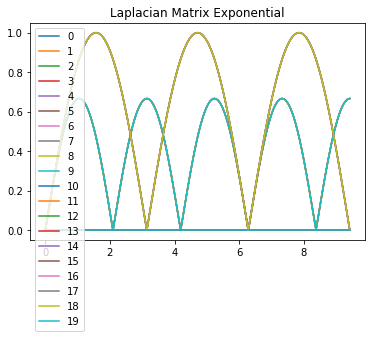


***************** How close each entry got to 1 *******************
              0             1             2             3    4
0  0.000000e+00  3.333334e-01  3.333334e-01  1.000000e+00  1.0
1  3.333334e-01  0.000000e+00  3.333334e-01  1.000000e+00  1.0
2  3.333334e-01  3.333334e-01  0.000000e+00  1.000000e+00  1.0
3  3.170682e-07  3.170682e-07  3.170682e-07 -8.881784e-16  1.0
4  3.170682e-07  3.170682e-07  3.170682e-07  1.000000e+00  0.0



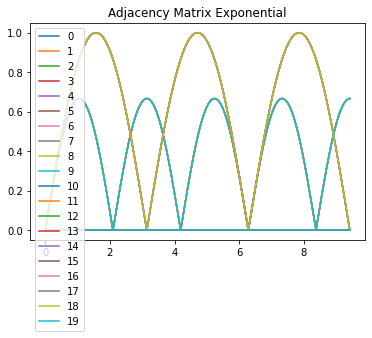

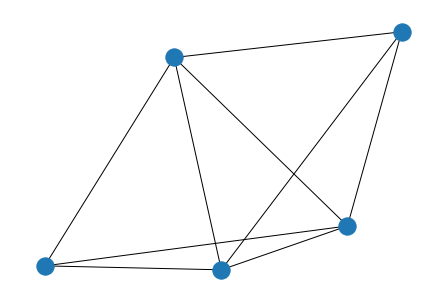

In [4]:
# k=3, s=1
mat = np.matrix([
        [0, 1, 1, 0, 0],
        [1, 0, 1, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
    ])
laplace = laplacian(mat, normed=False) # generate the laplacian

print("***************** Adjacency Matrix *******************")
pp(mat)                                     # Print the adjacency matrix
print("\n***************** Laplacian Matrix *******************")
pp(laplace)
print("\n***************** Laplacian Eigenvalues *******************")
print(eig(laplace))  # checking reality
print("\n***************** Adjacency Eigenvalues *******************")
print(eig(mat))

series = expm_entries(laplace)                  # Generate the expm series
print("\n***************** How close each entry got to 1 *******************")
pp(closest_to_one(series[1]))               # Show how close each entry got to one
plot_expm(series, True, title="Laplacian Matrix Exponential")

series = expm_entries(mat)
print("\n***************** How close each entry got to 1 *******************")
pp(closest_to_one(series[1]))               # Show how close each entry got to one
plot_expm(series, True, title="Adjacency Matrix Exponential")

draw_graph(mat)